Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data and erasing NaNs

In [3]:
# Load the dataset
data = pd.read_csv('FY25_Budget.csv')

# Replace "#Missing" with NaN and convert columns to numeric
for col in ['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Basic Exploration
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cabinet              943 non-null    object 
 1   Dept                 943 non-null    object 
 2   Program              943 non-null    object 
 3   Expense Category     943 non-null    object 
 4   FY22 Actual Expense  760 non-null    float64
 5   FY23 Actual Expense  805 non-null    float64
 6   FY24 Appropriation   814 non-null    float64
 7   FY25 Budget          849 non-null    float64
dtypes: float64(4), object(4)
memory usage: 59.1+ KB
None
       FY22 Actual Expense  FY23 Actual Expense  FY24 Appropriation  \
count         7.600000e+02         8.050000e+02        8.140000e+02   
mean          5.050831e+06         5.043092e+06        5.272929e+06   
std           2.644391e+07         2.759531e+07        2.880509e+07   
min           0.000000e+00        -2.473027e+05       

Display projected versus actual spending by program based on FY24 Appropriation and FY25 Budget.
Make several bar plots and use thresholds to improve readability of visuals.
Threshholds used: over 6 million dollars, between 4 and 6 million dollars, between 2 and 4 million dollars, and under 2 million dollars.

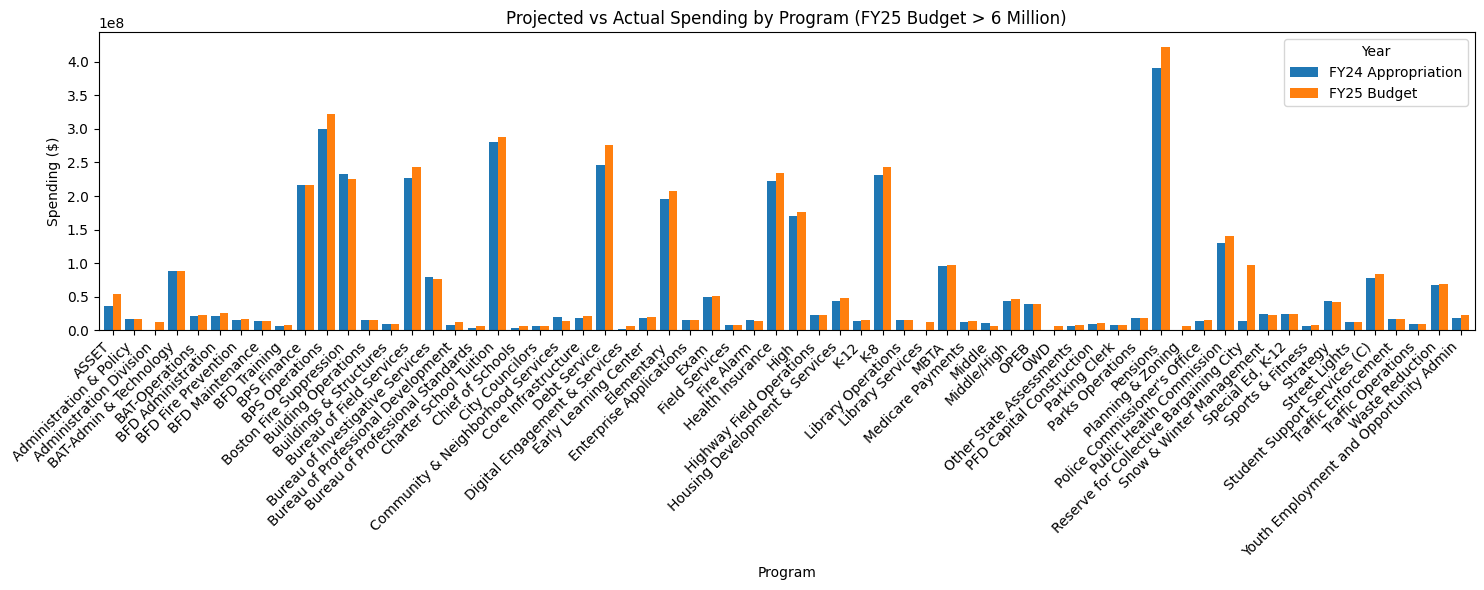

In [46]:
# Aggregate spending by program for FY24 Appropriation and FY25 Budget
comparison = data.groupby('Program')[['FY24 Appropriation', 'FY25 Budget']].sum()

# Filter to only include programs with an FY25 Budget above 6 million
comparison_filtered = comparison[comparison['FY25 Budget'] > 6 * 1e6]

# Plot the filtered data
ax = comparison_filtered.plot(kind='bar', figsize=(15, 6), width=0.8, color=['#1f77b4', '#ff7f0e'])
plt.title('Projected vs Actual Spending by Program (FY25 Budget > 6 Million)')
plt.xlabel('Program')
plt.ylabel('Spending ($)')

# Set xticks to show only labels for the filtered programs
ax.set_xticklabels(comparison_filtered.index, rotation=45, ha='right')

plt.legend(['FY24 Appropriation', 'FY25 Budget'], title='Year')
plt.tight_layout()
plt.show()

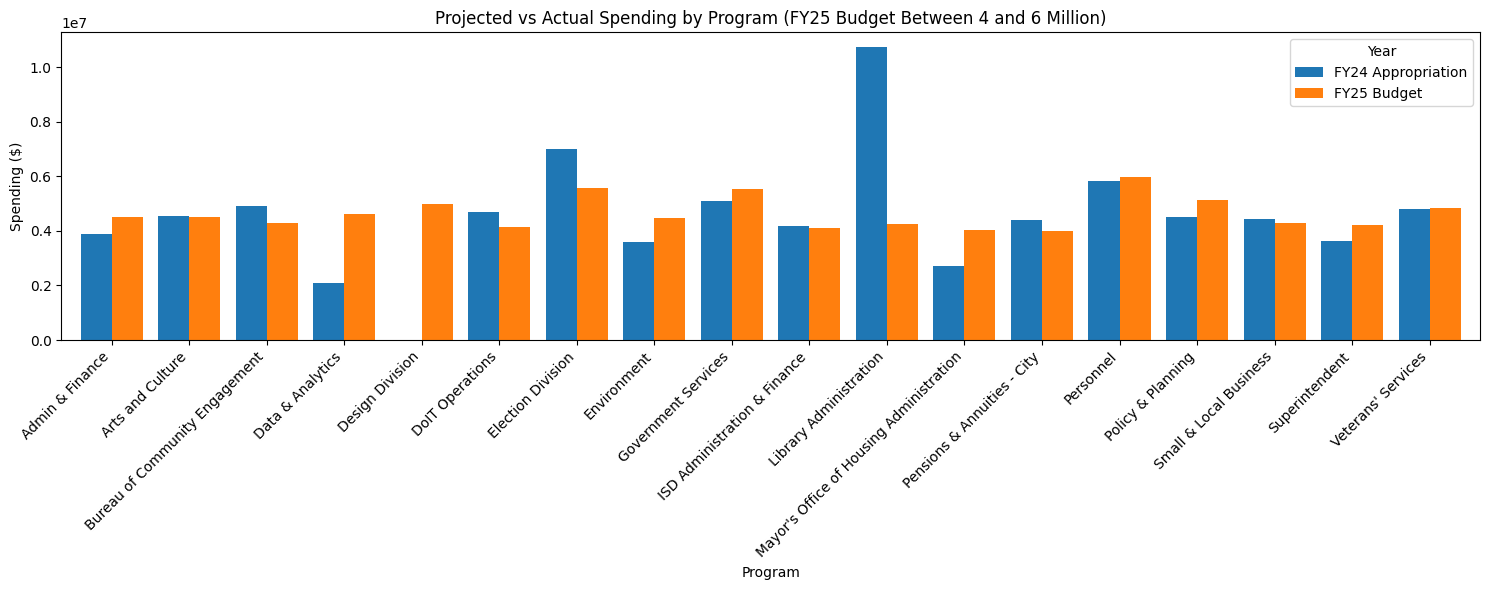

In [47]:
# Aggregate spending by program for FY24 Appropriation and FY25 Budget
comparison = data.groupby('Program')[['FY24 Appropriation', 'FY25 Budget']].sum()

# Filter to include programs with an FY25 Budget between 4 and 6 million
comparison_filtered = comparison[(comparison['FY25 Budget'] > 4 * 1e6) & (comparison['FY25 Budget'] < 6 * 1e6)]

# Plot the filtered data
ax = comparison_filtered.plot(kind='bar', figsize=(15, 6), width=0.8, color=['#1f77b4', '#ff7f0e'])
plt.title('Projected vs Actual Spending by Program (FY25 Budget Between 4 and 6 Million)')
plt.xlabel('Program')
plt.ylabel('Spending ($)')

# Set xticks to show only labels for the filtered programs
ax.set_xticklabels(comparison_filtered.index, rotation=45, ha='right')

plt.legend(['FY24 Appropriation', 'FY25 Budget'], title='Year')
plt.tight_layout()
plt.show()

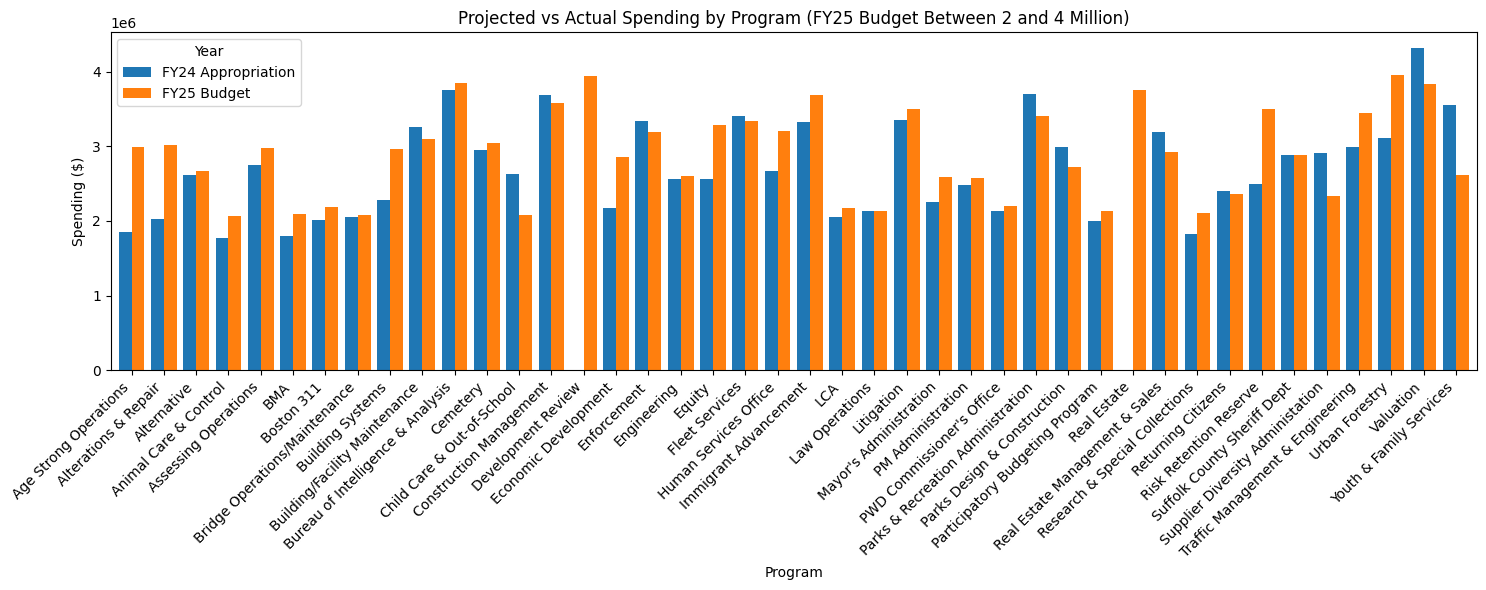

In [48]:
# Aggregate spending by program for FY24 Appropriation and FY25 Budget
comparison = data.groupby('Program')[['FY24 Appropriation', 'FY25 Budget']].sum()

# Filter to include programs with an FY25 Budget between 2 and 4 million
comparison_filtered = comparison[(comparison['FY25 Budget'] > 2 * 1e6) & (comparison['FY25 Budget'] < 4 * 1e6)]

# Plot the filtered data
ax = comparison_filtered.plot(kind='bar', figsize=(15, 6), width=0.8, color=['#1f77b4', '#ff7f0e'])
plt.title('Projected vs Actual Spending by Program (FY25 Budget Between 2 and 4 Million)')
plt.xlabel('Program')
plt.ylabel('Spending ($)')

# Set xticks to show only labels for the filtered programs
ax.set_xticklabels(comparison_filtered.index, rotation=45, ha='right')

plt.legend(['FY24 Appropriation', 'FY25 Budget'], title='Year')
plt.tight_layout()
plt.show()

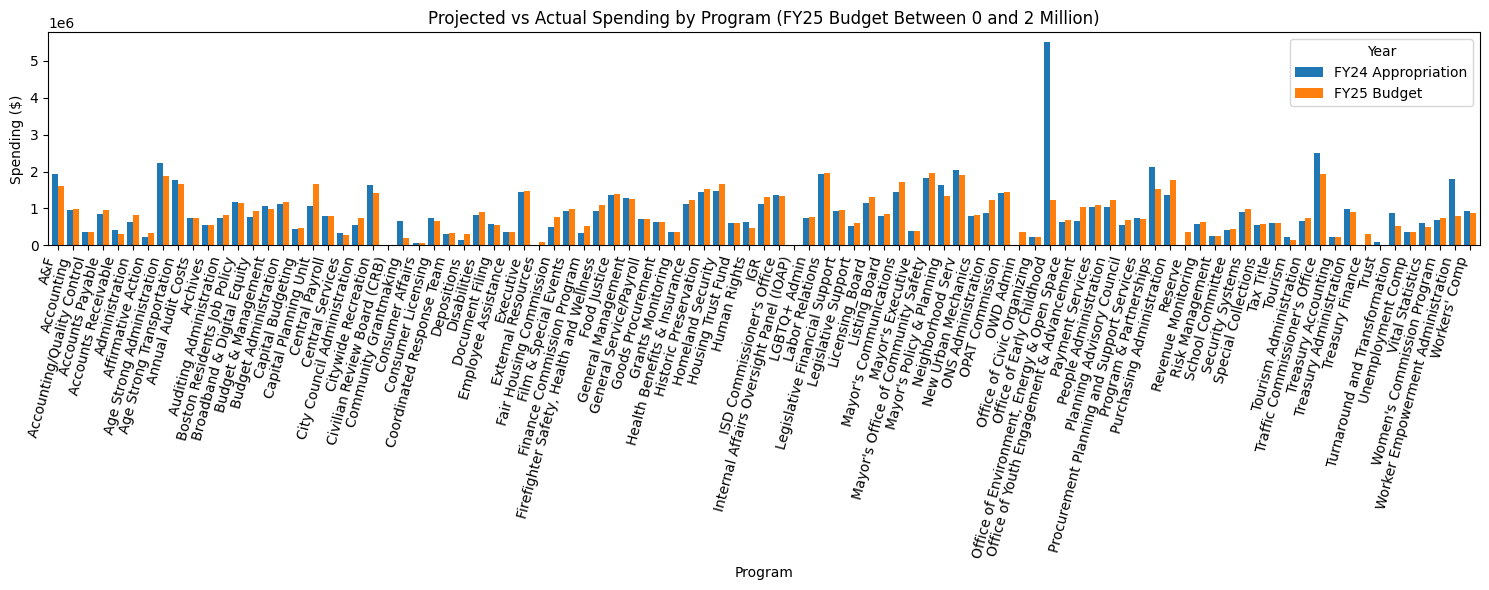

In [49]:
# Aggregate spending by program for FY24 Appropriation and FY25 Budget
comparison = data.groupby('Program')[['FY24 Appropriation', 'FY25 Budget']].sum()

# Filter to include programs with an FY25 Budget between 0 and 2 million
comparison_filtered = comparison[(comparison['FY25 Budget'] > 0 * 1e6) & (comparison['FY25 Budget'] < 2 * 1e6)]

# Plot the filtered data
ax = comparison_filtered.plot(kind='bar', figsize=(15, 6), width=0.8, color=['#1f77b4', '#ff7f0e'])
plt.title('Projected vs Actual Spending by Program (FY25 Budget Between 0 and 2 Million)')
plt.xlabel('Program')
plt.ylabel('Spending ($)')

# Set xticks to show only labels for the filtered programs
ax.set_xticklabels(comparison_filtered.index, rotation=75, ha='right')

plt.legend(['FY24 Appropriation', 'FY25 Budget'], title='Year')
plt.tight_layout()
plt.show()

Display a bar chart to highlight the top 10 programs based on the sum of spending from FY22 to FY25.

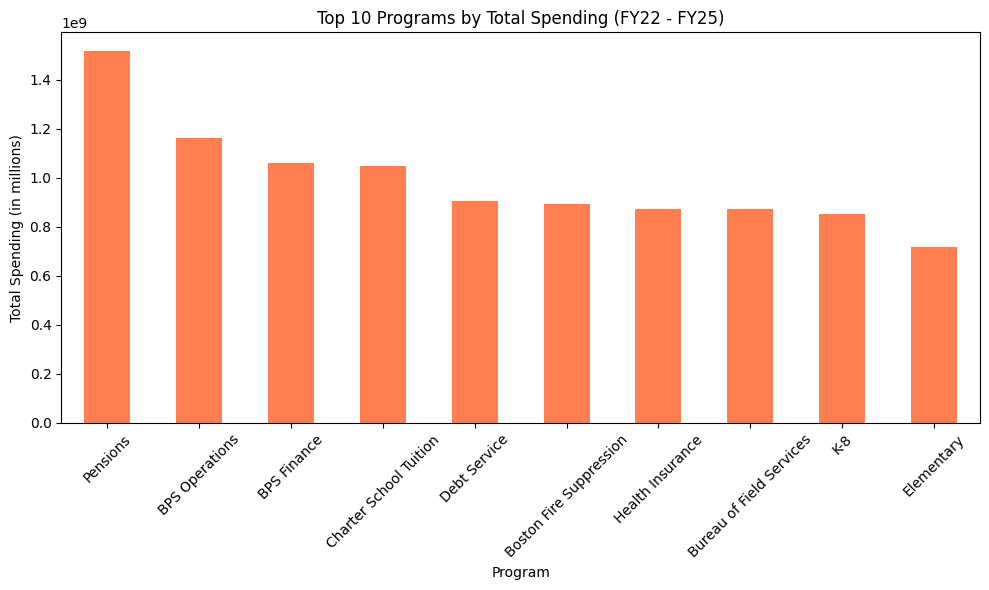

In [50]:
# Calculate total spending across all fiscal years for each program
program_total_spending = program_trends.sum(axis=1).sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
program_total_spending.plot(kind='bar', color='coral')
plt.title('Top 10 Programs by Total Spending (FY22 - FY25)')
plt.xlabel('Program')
plt.ylabel('Total Spending (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Display a bar chart to highlight the highest spending 10 programs based on their projected versus actual spending across FY24 and FY25. 

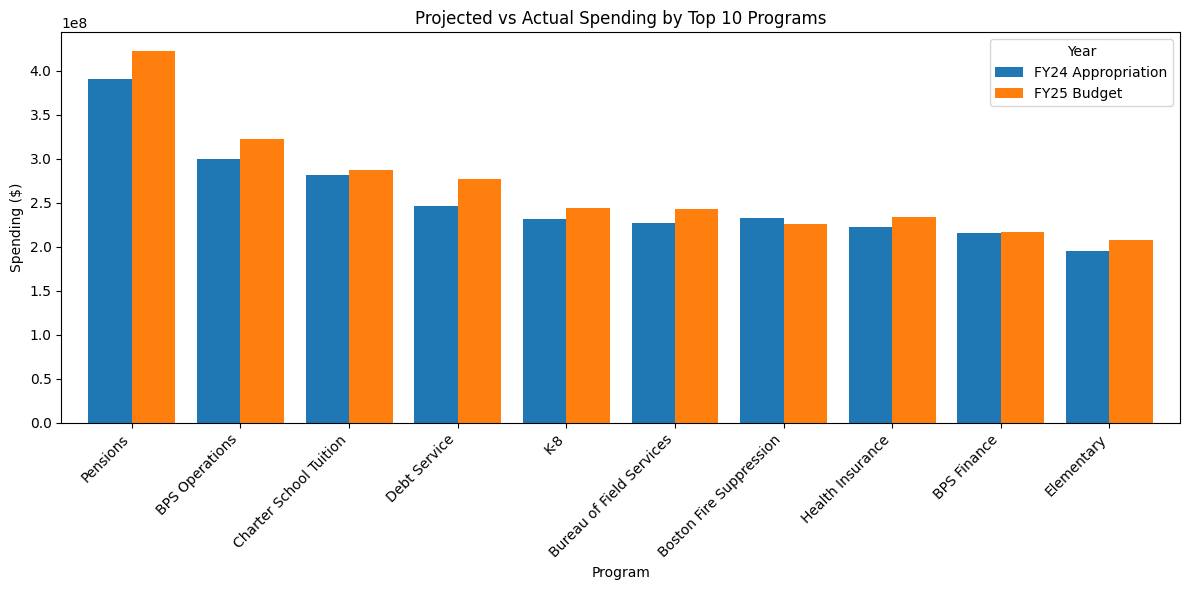

In [51]:
# Calculate total spending across FY24 and FY25 for each program to find the top 10
comparison = data.groupby('Program')[['FY24 Appropriation', 'FY25 Budget']].sum()
top_10_programs = comparison.sum(axis=1).nlargest(10).index

# Filter the comparison DataFrame to include only the top 10 programs
comparison_top_10 = comparison.loc[top_10_programs]

# Bar plot of projected vs. actual spending for the top 10 programs
comparison_top_10.plot(kind='bar', figsize=(12, 6), width=0.8, color=['#1f77b4', '#ff7f0e'])
plt.title('Projected vs Actual Spending by Top 10 Programs')
plt.xlabel('Program')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(['FY24 Appropriation', 'FY25 Budget'], title='Year')
plt.tight_layout()
plt.show()

Display a bar chart to highlight the highest spending 20 programs based on their projected versus actual spending across FY24 and FY25. 

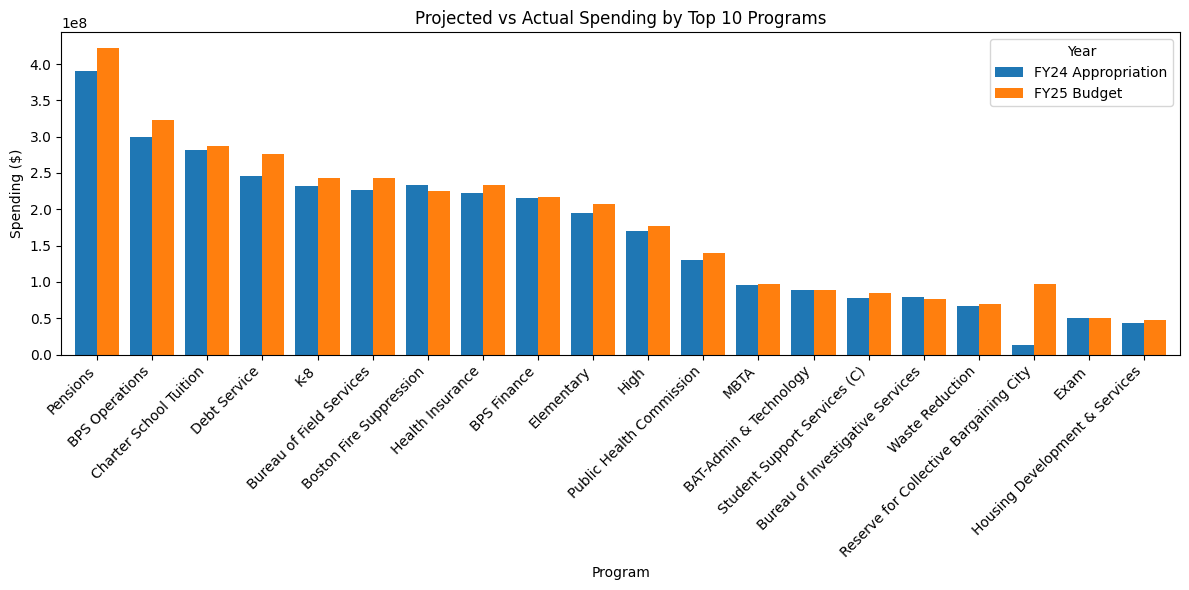

In [52]:
# Calculate total spending across FY24 and FY25 for each program to find the top 20
comparison = data.groupby('Program')[['FY24 Appropriation', 'FY25 Budget']].sum()
top_20_programs = comparison.sum(axis=1).nlargest(20).index

# Filter the comparison DataFrame to include only the top 10 programs
comparison_top_20 = comparison.loc[top_20_programs]

# Bar plot of projected vs. actual spending for the top 10 programs
comparison_top_20.plot(kind='bar', figsize=(12, 6), width=0.8, color=['#1f77b4', '#ff7f0e'])
plt.title('Projected vs Actual Spending by Top 10 Programs')
plt.xlabel('Program')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(['FY24 Appropriation', 'FY25 Budget'], title='Year')
plt.tight_layout()
plt.show()

Display spending trends by program

<Figure size 1400x800 with 0 Axes>

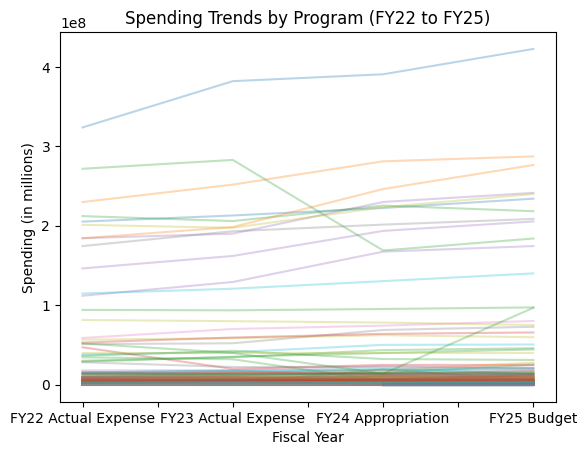

In [53]:
# Set index to Program for easier plotting
program_yearly = data.set_index('Program')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']]

# Line plot for each program
plt.figure(figsize=(14, 8))
program_yearly.T.plot(alpha=0.3, legend=False)
plt.title('Spending Trends by Program (FY22 to FY25)')
plt.xlabel('Fiscal Year')
plt.ylabel('Spending (in millions)')
plt.show()

/tmp/ipykernel_6070/1089731658.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


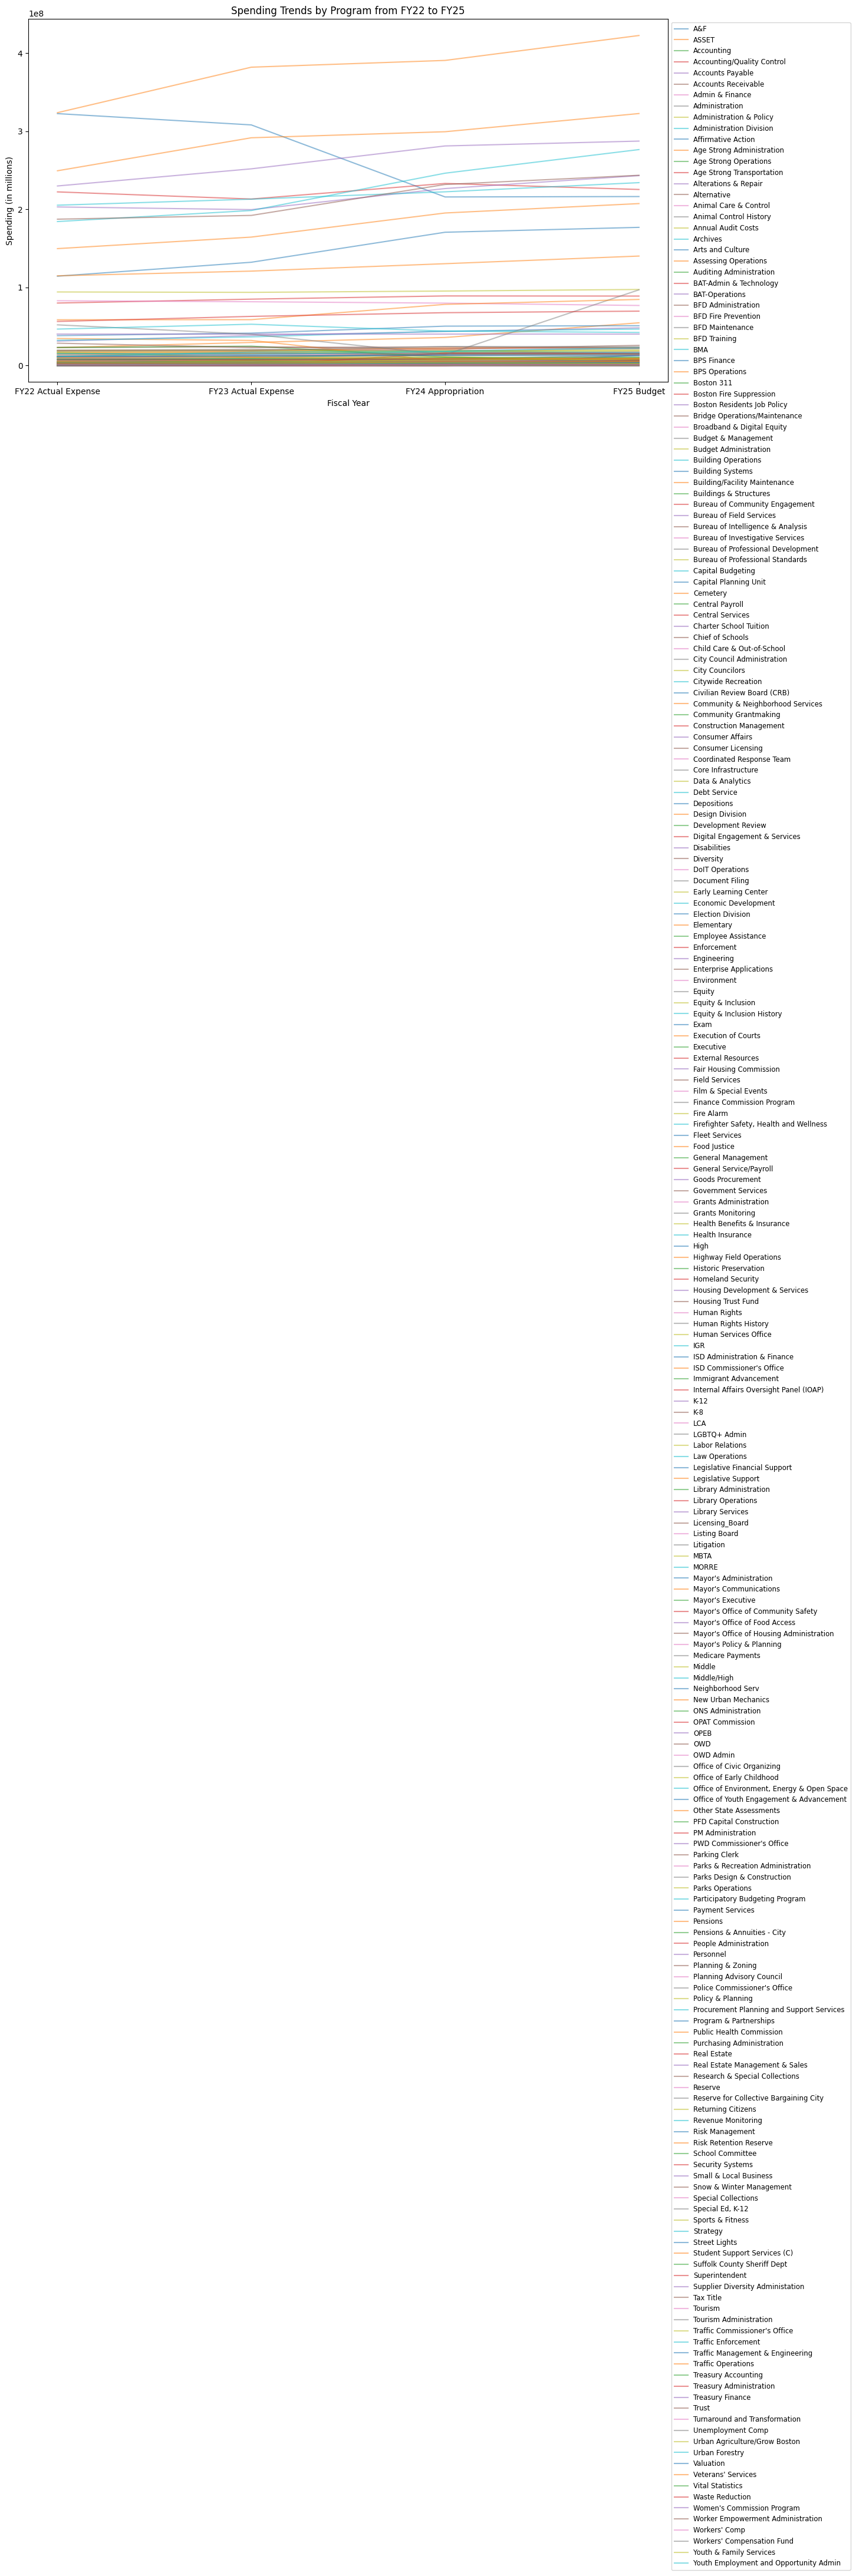

In [54]:
# Select only relevant fiscal year columns for spending
program_trends = data.groupby('Program')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()

# Plot trends over time
plt.figure(figsize=(14, 8))
for program in program_trends.index:
    plt.plot(program_trends.columns, program_trends.loc[program], label=program, alpha=0.5)

plt.title('Spending Trends by Program from FY22 to FY25')
plt.xlabel('Fiscal Year')
plt.ylabel('Spending (in millions)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()

Display spending trends by program for the top 5 programs 

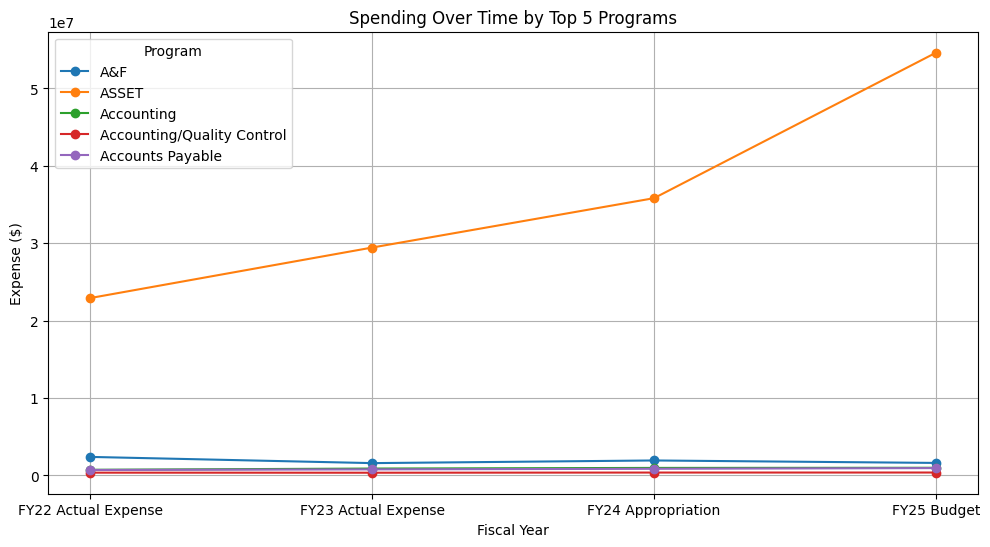

In [56]:
# Spending Over Time (Comparing FY22, FY23, FY24, FY25)
time_data = data.groupby('Program')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()

# Line plot for spending over years for top programs
plt.figure(figsize=(12, 6))
for program in time_data.index[:5]:  # Select top 5 programs for visualization
    plt.plot(time_data.columns, time_data.loc[program], marker='o', label=program)
plt.title('Spending Over Time by Top 5 Programs')
plt.xlabel('Fiscal Year')
plt.ylabel('Expense ($)')
plt.legend(title='Program')
plt.grid(True)
plt.show()

Display heatmap to show each program’s spending over the years, providing a visual to compare spending levels across time and programs.

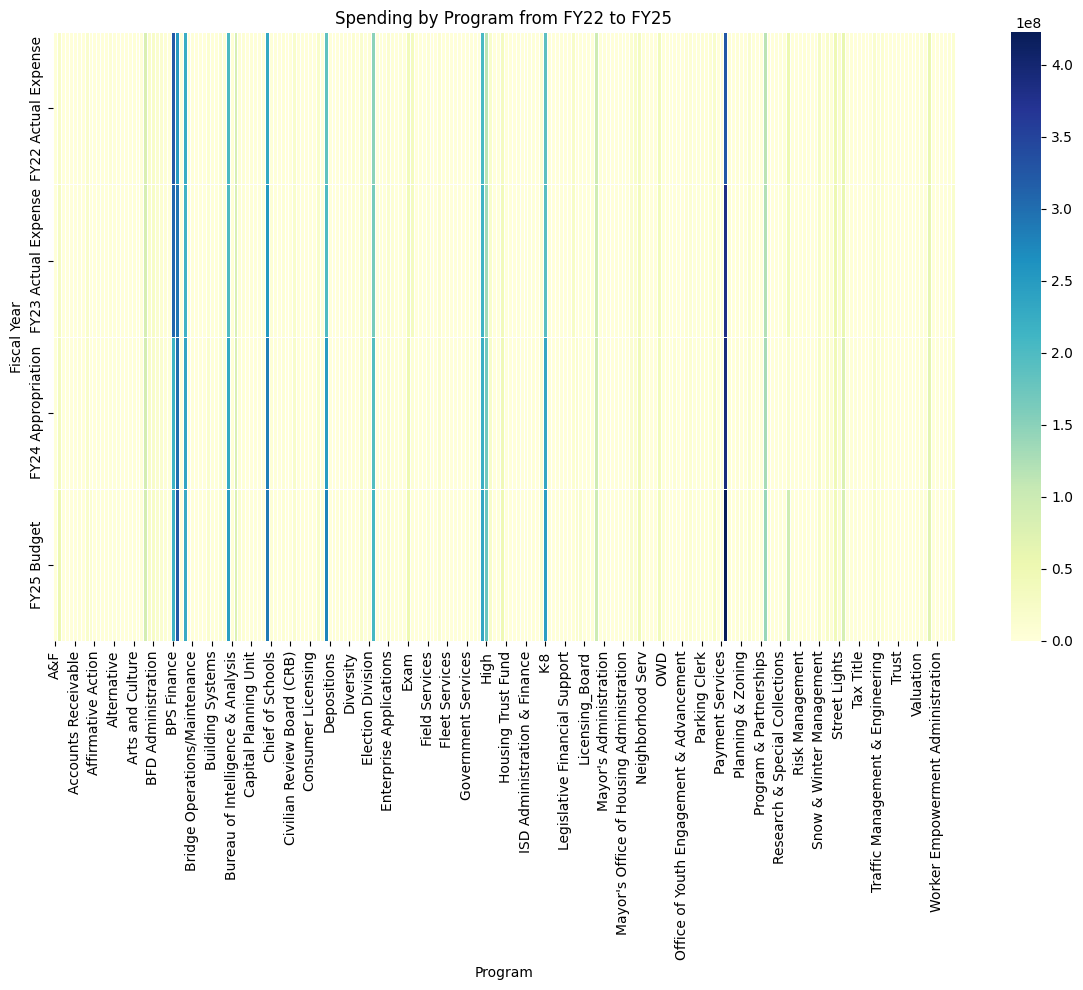

In [57]:
# Pivot the data to create a heatmap-ready format
program_heatmap = program_trends.T

plt.figure(figsize=(12, 10))
sns.heatmap(program_heatmap, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Spending by Program from FY22 to FY25')
plt.xlabel('Program')
plt.ylabel('Fiscal Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()